# THE SPARKS FOUNDATION

## Data Science and Business Analytics Internship

### Author : Harsh Jalan

### TASK 1: Prediction Using Supervised Machine Learning

### Problem Statement: Predict the percentage of a student based on the number of hours studied

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
# Import dataset for student score predication

df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [4]:
# Check for Null values

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#To find the descriptive statistics of dataset

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# Check relationship between the features of dataset

df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Visualizing The Data

<Axes: xlabel='Hours', ylabel='Density'>

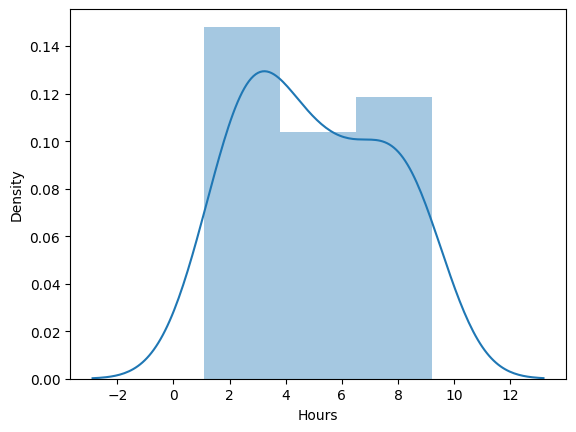

In [8]:
sns.distplot(df["Hours"])

<Axes: xlabel='Scores', ylabel='Density'>

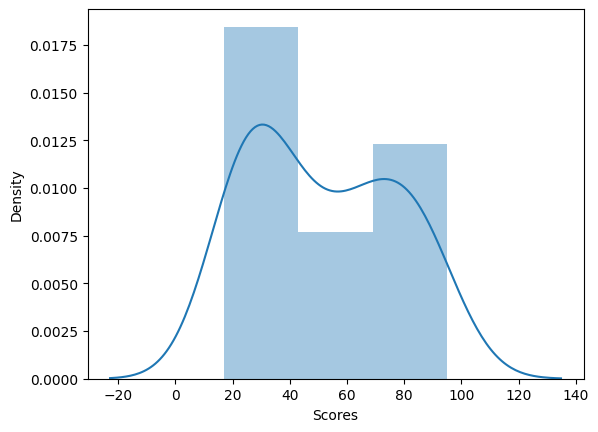

In [9]:
sns.distplot(df["Scores"])

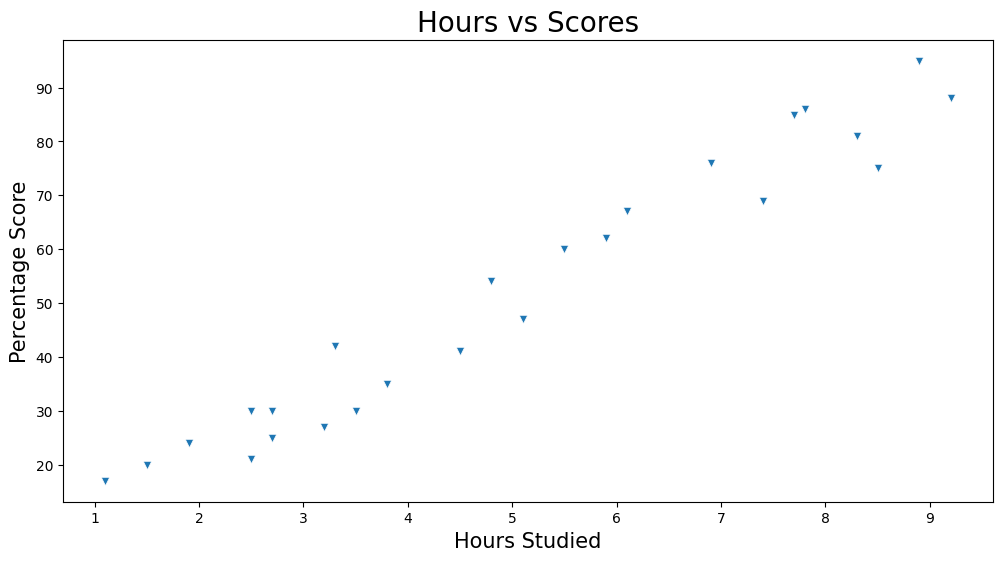

In [10]:
# Plotting the distribution of score

plt.figure(figsize=(12,6))
plt.title('Hours vs Scores', size=20)
plt.xlabel('Hours Studied', size=15)
plt.ylabel('Percentage Score', size=15)
sns.scatterplot(data=df,x="Hours",y = "Scores", marker = 'v')
plt.show()

### Objervation: We find a linear relationship between the student study hours and their scores in exam, So we will choose linear regression model to predict the student scores based on their study hours.

## Preparing The Data to trained our model

In [11]:
# split the dataset into independent and dependent feature.

x=df.iloc[:, :-1].values    # Independent Feature  # 2D array

y=df.iloc[:,1].values       # dependent feature    # 1D array

In [12]:
x,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

### Splitting Dataset Into Train and Test dataset

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [14]:
x_train.shape, x_test.shape

((20, 1), (5, 1))

### Model Trainig using linear Regression

In [15]:
from sklearn.linear_model import LinearRegression  

regressor = LinearRegression()  
regressor.fit(x_train.reshape(-1,1), y_train) 

print("Model Successfully Trained")

Model Successfully Trained


In [16]:
# Calulate the predicted score for testing data

y_pred = regressor.predict(x_test)
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [17]:
# Equation of best fit line 

line = regressor.coef_ * x + regressor.intercept_


### Calculation of model accuracy

In [18]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

print(f"The accuracy of our regression model is: {r2_score(y_test,y_pred)}")
print(f"Mean absolute error: {mean_absolute_error(y_test,y_pred)}")

The accuracy of our regression model is: 0.9678055545167994
Mean absolute error: 3.9207511902099244


### Plotting Linear Regression Model

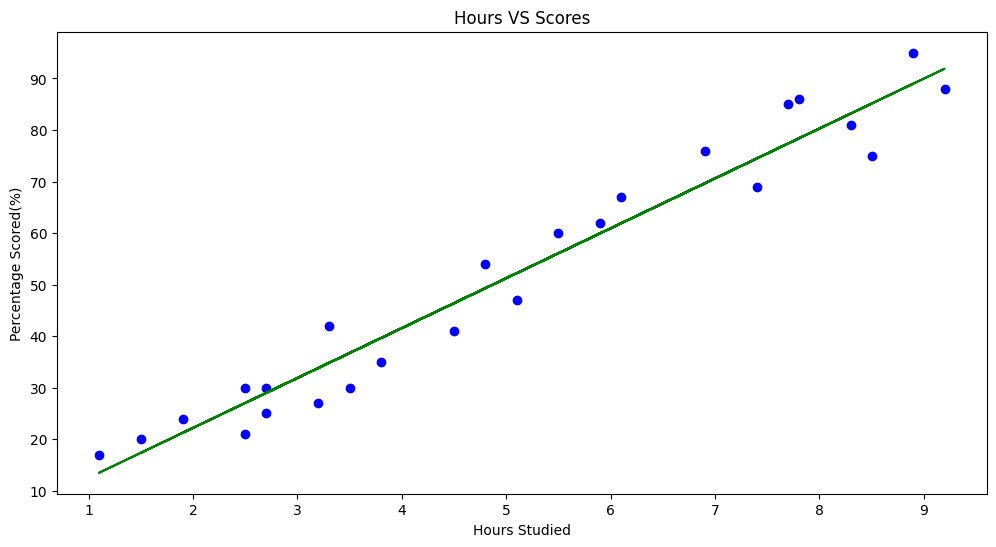

In [19]:
# Plotting the scatter plot with the best fit line

plt.figure(figsize=(12,6))
plt.scatter(x,y,color='blue',marker='o')
plt.plot(x,line,color='green')
plt.title('Hours VS Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored(%)')
plt.show()

### Comparing the predicting data and actual data

In [20]:
df1 = pd.DataFrame({"Actual Score":y_test,"Predicted Score":y_pred})
df1

,Actual Score,Predicted Score
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


## Now we test our model with our own data

In [21]:
hours = 9.25
test = np.array([hours]).reshape(-1,1)

own_pred=regressor.predict(test)

print(f"No. of hours: {hours} student study.")
print(f"Predicted Score for this student is: {own_pred[0]}")

No. of hours: 9.25 student study.
Predicted Score for this student is: 92.38611528261494


# We can conclude that based on our model that if a student study 9.25 hours per day for exam he will be score approximate 92.39 Score in exam. 